# Data Cleaning and Exploration
#### Adapted from kernels by wonderful kagglers [here](https://www.kaggle.com/moonpray/base-script-and-good-scoring), [here](https://www.kaggle.com/lesibius/crime-scene-exploration-and-model-fit), and [here](https://www.kaggle.com/abhimicro3/eda-of-san-francisco-crime-classification). Check out these pages for more info.

Workshop led by Bernard Koch and Alina Arseniev-Koehler

See accompanying powerpoint on the [CompSoc website](https://sites.google.com/g.ucla.edu/compsoc/compsoc-tutorials/lifecourse-of-a-compsoc-project). 

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Sample for loading data on Bernie's computer:

In [17]:
windows_path='C:\\Users/bernard/'
unix_path='/home/bernard/'
train = pd.read_csv(windows_path+'Box Sync/CompSoc Bootcamp/all/train.csv',parse_dates=['Dates'])

Sample for loading data on Alina's computer (train.csv in working directory)

In [8]:
train= pd.read_csv('train.csv', parse_dates=['Dates'])

## EDA (Exploratory Data Analysis)

First let's do some exploratory data analysis to see how the data is structured. Here are a few ways to do this in pandas.

In [7]:
print("DATA DESCRIPTION:\n",train.head())
print("\nDATA TYPES:\n",train.dtypes)
print("\nSHAPE:\n",train.shape)
print("\nINFO:\n",train.info())
print("\nDESCRIPE\n:",train.describe())

DATA DESCRIPTION:
                  Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.8

Okay so it looks like we have these input variables:
+ **Date**
+ **Description** (probably too similar to outcome)
+ **Day of the week**
+ **PdDistrict**
+ **Resolution** (probably not useful if we are trying to predict crimes, but could be very interesting from a social scientific perspective)
+ **Address**
+ **Coordinates**

Our outcome variable is going to be: **Category**!

First, let's check for missing data

In [4]:
train.columns[train.isnull().any()]

Index([], dtype='object')

No missing data (we're assuming that missing data doesn't have any special codes, but sometimes has a 999 or other code, you'll need to look at the data key/documentation for each dataset to learn how missing data is coded). 

Let's look at the dependent variable we are trying to predict: **Category**

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

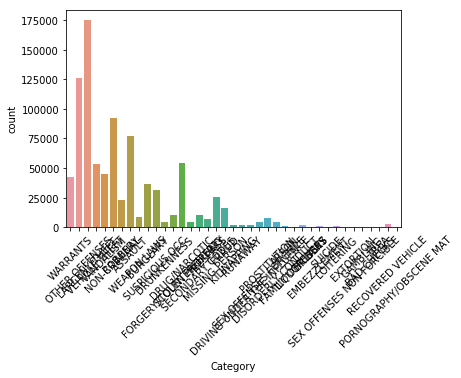

In [13]:
print(train['Category'].value_counts())
sns.countplot(data=train,  x='Category')
plt.xticks(rotation=45)

LARCENY/THEFT                  0.199192
OTHER OFFENSES                 0.342899
NON-CRIMINAL                   0.448023
ASSAULT                        0.535576
DRUG/NARCOTIC                  0.597043
VEHICLE THEFT                  0.658294
VANDALISM                      0.709230
WARRANTS                       0.757307
BURGLARY                       0.799167
SUSPICIOUS OCC                 0.834944
MISSING PERSON                 0.864543
ROBBERY                        0.890737
FRAUD                          0.909733
FORGERY/COUNTERFEITING         0.921815
SECONDARY CODES                0.933187
WEAPON LAWS                    0.942930
PROSTITUTION                   0.951454
TRESPASS                       0.959797
STOLEN PROPERTY                0.964968
SEX OFFENSES FORCIBLE          0.969965
DISORDERLY CONDUCT             0.974885
DRUNKENNESS                    0.979760
RECOVERED VEHICLE              0.983334
KIDNAPPING                     0.986000
DRIVING UNDER THE INFLUENCE    0.988583


[Text(0,0,'LARCENY/THEFT'),
 Text(0,0,'OTHER OFFENSES'),
 Text(0,0,'NON-CRIMINAL'),
 Text(0,0,'ASSAULT'),
 Text(0,0,'DRUG/NARCOTIC'),
 Text(0,0,'VEHICLE THEFT'),
 Text(0,0,'VANDALISM'),
 Text(0,0,'WARRANTS'),
 Text(0,0,'BURGLARY'),
 Text(0,0,'SUSPICIOUS OCC'),
 Text(0,0,'MISSING PERSON'),
 Text(0,0,'ROBBERY'),
 Text(0,0,'FRAUD'),
 Text(0,0,'FORGERY/COUNTERFEITING'),
 Text(0,0,'SECONDARY CODES'),
 Text(0,0,'WEAPON LAWS'),
 Text(0,0,'PROSTITUTION'),
 Text(0,0,'TRESPASS'),
 Text(0,0,'STOLEN PROPERTY'),
 Text(0,0,'SEX OFFENSES FORCIBLE'),
 Text(0,0,'DISORDERLY CONDUCT'),
 Text(0,0,'DRUNKENNESS'),
 Text(0,0,'RECOVERED VEHICLE'),
 Text(0,0,'KIDNAPPING'),
 Text(0,0,'DRIVING UNDER THE INFLUENCE'),
 Text(0,0,'RUNAWAY'),
 Text(0,0,'LIQUOR LAWS'),
 Text(0,0,'ARSON'),
 Text(0,0,'LOITERING'),
 Text(0,0,'EMBEZZLEMENT'),
 Text(0,0,'SUICIDE'),
 Text(0,0,'FAMILY OFFENSES'),
 Text(0,0,'BAD CHECKS'),
 Text(0,0,'BRIBERY'),
 Text(0,0,'EXTORTION'),
 Text(0,0,'SEX OFFENSES NON FORCIBLE'),
 Text(0,0,'GAMBLING

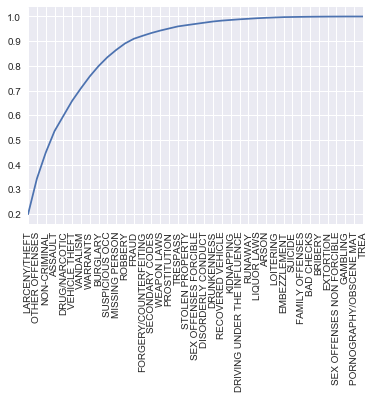

In [108]:
pareto_crime = (train['Category'].value_counts() / train.shape[0]) #normalize
pareto_crime = pareto_crime.cumsum()
pareto_crime = pareto_crime.sort_values()
print(pareto_crime)
pareto_plot=sns.tsplot(data=pareto_crime.values)
pareto_plot.set_xticks(np.arange(len(pareto_crime)))
pareto_plot.set_xticklabels(pareto_crime.index,rotation=90)

It looks like 83% of the crimes committed fall into just 10 categories. If our job is to predict crimes it may make sense to just focus on the largest categories so we don't overfit the data. We'll create a reduced dataset later...

Okay let's look at input variables starting with **PdDistrict**:

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

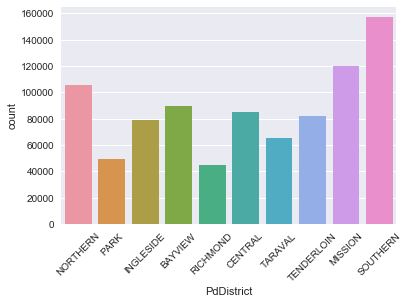

In [114]:
print(train['PdDistrict'].value_counts())
sns.countplot(data=train,  x='PdDistrict')
plt.xticks(rotation=45)

**Day of the week**

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64


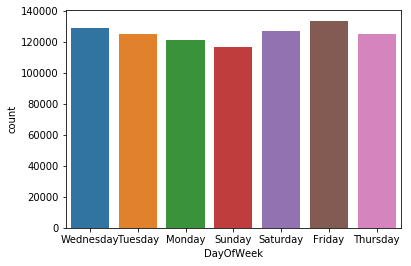

In [14]:
print(train['DayOfWeek'].value_counts())
sns.countplot(train['DayOfWeek'])
#plt.xticks(rotation=45)

## Feature engineering

We're going to want to break down the date and address variables into something a little bit more useful.

For date: let's try and create year, hours, time of day, and seasons. EDIT: THERE ARENT SEASONS IN THE BAY AREA SO SCRATCH THAT

For address: let's get whether it's a street or a block, and maybe the street name

Let's start by getting **hour**,**month**,**year**, assigning them to new columns, and seeing what they look like

In [15]:
train['Year']=train['Dates'].dt.year
train['Month']=train['Dates'].dt.month
train['Hour']=train['Dates'].dt.hour

2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: Year, dtype: int64


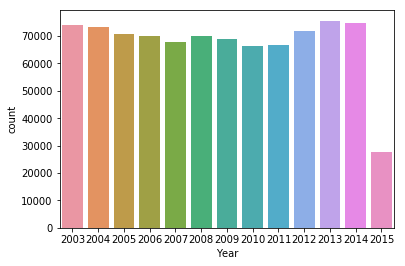

In [16]:
print(train['Year'].value_counts())
sns.countplot(train['Year'])

10    80274
5     79644
4     78096
3     76320
1     73536
11    72975
9     71982
6     70892
2     70813
7     69971
8     68540
12    65006
Name: Month, dtype: int64


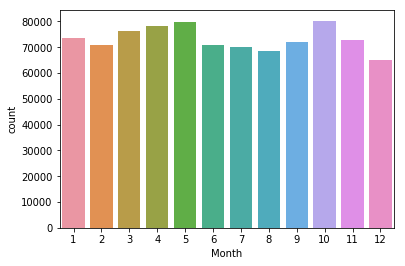

In [17]:
print(train['Month'].value_counts())
sns.countplot(train['Month'])

18    55104
17    53553
12    51934
16    50137
19    49475
15    48058
22    45741
0     44865
20    44694
14    44424
21    43661
13    43145
23    42460
11    38373
10    37806
9     35555
8     32900
1     26173
2     22296
7     22048
3     14014
6     13133
4      9863
5      8637
Name: Hour, dtype: int64


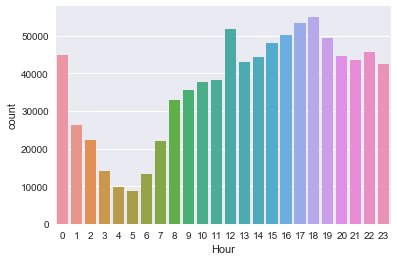

In [73]:
print(train['Hour'].value_counts())
sns.countplot(train['Hour'])

Even people who commit crimes sleep (or at least the cops do!)

MAYBE DROP THIS

For the possibility that it could be useful in prediction lets create time of day variables. In reality we might want to check that this is useful by looking at correlation between

In [118]:
def time_of_day(hour):
    if hour>=2 and hour <8: return "Night"
    elif hour>=8 and hour <12: return "Morning"
    elif hour>=12 and hour <18: return "Afternoon"
    elif hour>=18 and hour <2: return "Evening"


### Cleaning Address and breaking it down
The first thing we need to do is clean the address so that intersections are always treated the same. In otherwords we need "OAK ST / LAGUNA ST" to be the same as "LAGUNA ST / OAK ST" I'll show you this is a problem. This also a good chance to show you the <code>DATAFRAME.loc</code> operator.

In [192]:
print(train.loc[train['Address']=="TEHAMA ST / 5TH ST",'Address'])
print(train.loc[train['Address']=="5TH ST / TEHAMA ST",'Address'])

33063     TEHAMA ST / 5TH ST
73778     TEHAMA ST / 5TH ST
107539    TEHAMA ST / 5TH ST
107872    TEHAMA ST / 5TH ST
122585    TEHAMA ST / 5TH ST
297832    TEHAMA ST / 5TH ST
387932    TEHAMA ST / 5TH ST
389028    TEHAMA ST / 5TH ST
427370    TEHAMA ST / 5TH ST
458309    TEHAMA ST / 5TH ST
490885    TEHAMA ST / 5TH ST
595890    TEHAMA ST / 5TH ST
595891    TEHAMA ST / 5TH ST
595892    TEHAMA ST / 5TH ST
597680    TEHAMA ST / 5TH ST
618074    TEHAMA ST / 5TH ST
670370    TEHAMA ST / 5TH ST
670372    TEHAMA ST / 5TH ST
672490    TEHAMA ST / 5TH ST
689786    TEHAMA ST / 5TH ST
833426    TEHAMA ST / 5TH ST
Name: Address, dtype: object
451       5TH ST / TEHAMA ST
18975     5TH ST / TEHAMA ST
21045     5TH ST / TEHAMA ST
44898     5TH ST / TEHAMA ST
44899     5TH ST / TEHAMA ST
74273     5TH ST / TEHAMA ST
106313    5TH ST / TEHAMA ST
131240    5TH ST / TEHAMA ST
299243    5TH ST / TEHAMA ST
330070    5TH ST / TEHAMA ST
392120    5TH ST / TEHAMA ST
431561    5TH ST / TEHAMA ST
474174    5TH 

Here's a test. See if you can follow what's going on here:

In [193]:
def alphabetize_address(address):
    if address.find('/')!=-1:
        first=address.replace(' ','').split('/')[0]
        second=address.replace(' ','').split('/')[1]
        if second=='': return address # This is the typo situation where no second street given
        if first[0] > second[0]: #first letter of first address comes after first letter of second
            split= address.split('/')
            new_address= split[1].lstrip()+' / '+split[0].rstrip()
            return new_address
    return address
            
train['clean_Address']=train['Address'].apply(lambda a: alphabetize_address(a))


If we were going to do a really good job we'd find the nearest intersection from the address. But let's keep it simple.

For now let's just create a feature for block versus intersection. (Maybe different crimes occur on streets versus intersections).

Let's also just code one of the streets. Maybe it'll be helpful...

In [194]:
train['Block']=train['Address'].apply(lambda x: "Block" if x.find("Block")!=-1 else "Intersection" ) #May not be useful
train['Street']=train['clean_Address'].apply(lambda x: x.split(' ')[-2])

Block           617231
Intersection    260818
Name: Block, dtype: int64
MISSION           44339
MARKET            38128
BRYANT            31418
TURK              16503
GEARY             14052
OFARRELL          12228
FOLSOM            11065
EDDY               9749
TAYLOR             9488
HYDE               9454
VANNESS            9383
JONES              9351
POLK               9176
POWELL             9173
ELLIS              9012
HARRISON           8993
LEAVENWORTH        8708
POTRERO            8371
POST               8214
VALENCIA           8147
NESS               7947
SUTTER             7742
HOWARD             7681
6TH                6947
STOCKTON           6900
HAIGHT             6810
LARKIN             6703
3RD                6665
CALIFORNIA         5552
GATE               5539
                  ...  
SHERIDAN            109
NAVY                109
ELLINGTON           109
GRIJALVA            109
TELEGRAPHHILL       109
LAPU-LAPU           108
VENUS               108
GIANTS          

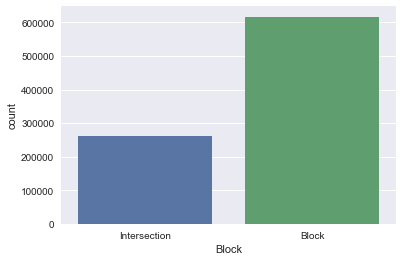

In [191]:
sns.countplot(train['Block'])
print(train['Block'].value_counts())
street_reduced=train.Street.value_counts()
print(street_reduced[street_reduced>100])

## Exploring relationships between a couple of different variables

To make these visuals more readable let's start by reducing our dataset to the top 10 crimes using:

In [19]:
train_reduced=train[train['Category'].isin(pareto_crime.index[:10])]
print(train_reduced.shape)

NameError: name 'pareto_crime' is not defined

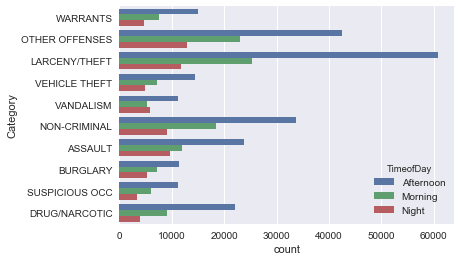

In [196]:
sns.countplot(data=train_reduced, y='Category', hue='TimeofDay')

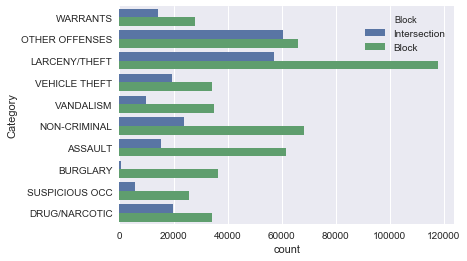

In [197]:
sns.countplot(data=train_reduced, y='Category', hue='Block')

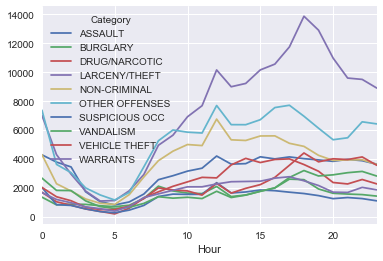

In [215]:
train_reduced.groupby(['Hour','Category'])['Descript'].count().unstack().plot()

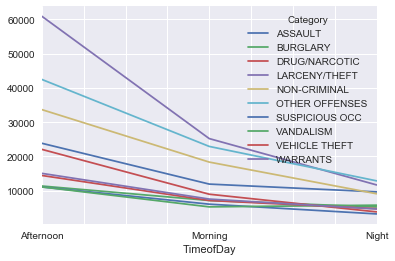

In [216]:
train_reduced.groupby(['TimeofDay','Category'])['Descript'].count().unstack().plot()

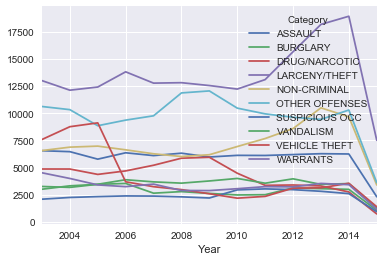

In [217]:
train_reduced.groupby(['Year','Category'])['Descript'].count().unstack().plot()

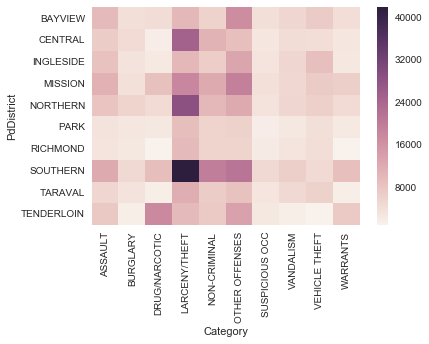

In [221]:
sns.heatmap(train_reduced.groupby(['PdDistrict','Category'])['Descript'].count().unstack())

Let's normalize to see things more clearly...

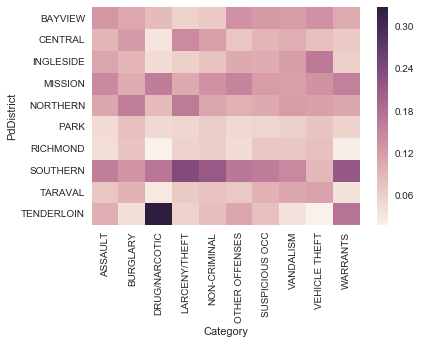

In [230]:
district_cat=train_reduced.groupby(['PdDistrict','Category'])['Descript'].count().unstack()
normalized=district_cat.apply(lambda x: x/sum(x),axis=0)
sns.heatmap(normalized)

In [18]:
categories=train_reduced['Category'].unique()
print(categories)
for c in categories[:2]:
    with sns.axes_style("white"):
        sns.jointplot(x='X' , y='Y', data=train_reduced.loc[train_reduced['Category']==c],\
                      stat_func = None,kind="hex", color="r")
        sns.plt.title(c)

NameError: name 'train_reduced' is not defined

**Activity: Come up with a cool plot!**